In [1]:
library(ggplot2)
options(repr.plot.width=4, repr.plot.height=4) # Size of the plots

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


# <font color='#FD7C6E'> Z-test </font>

We will perform a z-test **step by step** to understand each part of the hypothesis test.

Lets load for the last time (this time for real) the Pokemon dataset

In [2]:
pokemon.df <- read.csv("pokemon.csv")
population.attack <- pokemon.df$Attack
mean(population.attack)

[1] 79.00125

### Are fairy pokemons weaker in comparison to the rest of the pokemons?

In [3]:
fairy.attack <- pokemon.df[pokemon.df$Type.1=="Fairy", ]$Attack
mean(fairy.attack)

[1] 61.52941

Just by comparing the means it looks like they are weaker, but are they statistically significantly weaker?

**STEP 1: Define H0 and H1**

\begin{equation*}
H_0: \overline{X}_{fairy} = \mu_{all}
\end{equation*}

\begin{equation*}
H_1: \overline{X}_{fairy} < \mu_{all}
\end{equation*}

One-sided hypothesis

**STEP 2: Define Significance Level**

\begin{equation*}
\alpha = 0.05
\end{equation*}

**STEP 3: Find test statistic**

\begin{equation*}
Z = \frac{\mu - \overline{X}}{SE} = \frac{\mu - \overline{X}}{\frac{\sigma}{\sqrt{N}}}
\end{equation*}

In [4]:
SE <- sd(population.attack)/sqrt(length(fairy.attack))
SE

[1] 7.872068

In [5]:
Z <- (mean(population.attack) - mean(fairy.attack))/SE
Z

[1] 2.219473

**STEP 4: Find critical value**

In [6]:
critical.value <- qnorm(0.95)
critical.value

[1] 1.644854

**STEP 5: Make a decision**

Z is bigger than the critical value!

= Reject the null : 

Fairy pokemons are statistically weaker than the rest of the pokemons

**Alternative STEP 4: Calculate p-value**

In [7]:
p.value <- 1 - pnorm(Z)
p.value

[1] 0.01322729

**Alternative STEP 5: Make a decision**

p value is smaller than significance level 0.05

We reject the null!

(Note that with a significance level of 0.01 we would not be able to reject the null)

**STEP 6: Calculate effect size**

\begin{equation*}
d = \frac{\mu - \overline{X}}{\sigma} 
\end{equation*}

* d= 0 to .2 (small effect size)
* d = .2 to .5 (middle effect size)
* d = .5 or more (large effect size)

In [8]:
d <- (mean(population.attack) - mean(fairy.attack))/sd(population.attack)
d

[1] 0.5383012

Large effect!

### Activity 1: Is the attack of Fire pokemons different from the mean attack of all pokemons?

In [9]:
fire.attack <- pokemon.df[pokemon.df$Type.1=="Fire", ]$Attack
mean(fire.attack)

[1] 84.76923

In [10]:
SE <- sd(population.attack)/sqrt(length(fire.attack))
Z <- (mean(population.attack) - mean(fire.attack))/SE
Z

[1] -1.281481

In [11]:
critical.value <- qnorm(0.975)
critical.value

[1] 1.959964

In [12]:
p.value <- pnorm(Z)*2
p.value

[1] 0.2000247

# <font color='#FD7C6E'> Independent t-test </font>

**Good News** From now on we will not calculate test statistics, standard errors, critical values and p-values "manually". We will let R do the job for us

In [13]:
oktober.df <- read.csv("oktoberfest.csv")
oktober.df

jahr,dauer,besucher_gesamt,besucher_tag
1985,16,7.1,444
1986,16,6.7,419
1987,16,6.5,406
1988,16,5.7,356
1989,16,6.2,388
1990,16,6.7,419
1991,16,6.4,400
1992,16,5.9,369
1993,16,6.5,406
1994,16,6.6,413


In [14]:
oktober.df$zeit <- c(rep("before", 16), rep("after", 18))
oktober.df

jahr,dauer,besucher_gesamt,besucher_tag,zeit
1985,16,7.1,444,before
1986,16,6.7,419,before
1987,16,6.5,406,before
1988,16,5.7,356,before
1989,16,6.2,388,before
1990,16,6.7,419,before
1991,16,6.4,400,before
1992,16,5.9,369,before
1993,16,6.5,406,before
1994,16,6.6,413,before


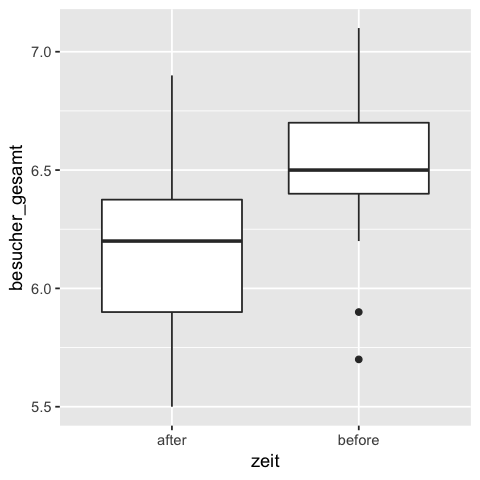

In [15]:
ggplot(data=oktober.df, aes(x=zeit, y=besucher_gesamt)) + geom_boxplot()

In [16]:
group1 <- oktober.df[oktober.df$zeit=="before", ]$besucher_gesamt
group2 <- oktober.df[oktober.df$zeit=="after", ]$besucher_gesamt

In [17]:
t.test(group1, group2, alternative="greater")


	Welch Two Sample t-test

data:  group1 and group2
t = 3.0715, df = 31.361, p-value = 0.002189
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 0.167443      Inf
sample estimates:
mean of x mean of y 
 6.512500  6.138889 


**Effect size**

\begin{equation*}
r = \sqrt{\frac{t^2}{(t^2 + df)} }
\end{equation*}

* small effect: r = .1
* medium effect: r = .3
* large effect: r= .5

In [18]:
r <- sqrt(3.0715^2 / (3.0715^2 + 31.361))
r

[1] 0.4808908

### Activity 2: Fill out the questionaire: https://forms.gle/N3LeF4xqaQ7mFAiJ9

In [19]:
questions.df <- read.csv("questions.csv")
questions.df

genre,sit,beer,sleep
Woman,Front,0.0,7.0
Woman,Back,0.0,7.5
Woman,Back,0.0,6.0
Woman,Back,2.0,8.0
Man,Front,0.0,6.0
Woman,Back,1.0,10.0
Man,Back,1.0,8.0
Man,Back,1.0,6.0
Woman,Back,3.0,8.0
Woman,Front,1.0,7.0


In [20]:
beer.w <- questions.df[questions.df$genre=="Woman",]$beer
beer.m <- questions.df[questions.df$genre=="Man",]$beer
sleep.w <- questions.df[questions.df$genre=="Woman",]$sleep
sleep.m <- questions.df[questions.df$genre=="Man",]$sleep

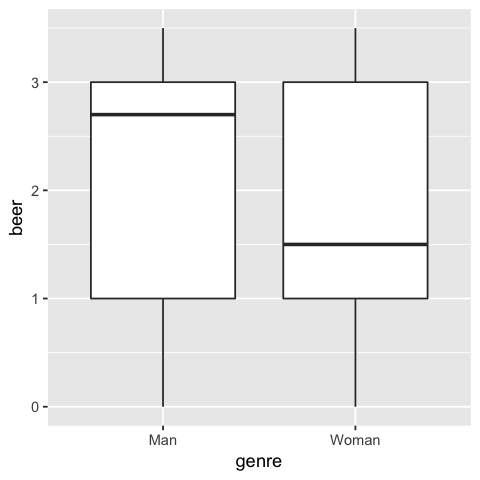

In [21]:
ggplot(data=questions.df, aes(x=genre, y=beer)) + geom_boxplot()

In [22]:
t.test(beer.m, beer.w, alternative="greater")


	Welch Two Sample t-test

data:  beer.m and beer.w
t = 0.87738, df = 14.707, p-value = 0.1972
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 -0.4974491        Inf
sample estimates:
mean of x mean of y 
 2.112500  1.615385 


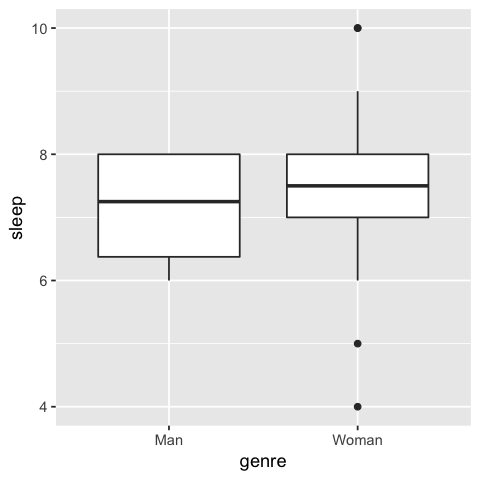

In [23]:
ggplot(data=questions.df, aes(x=genre, y=sleep)) + geom_boxplot()

In [24]:
t.test(sleep.m, sleep.w, alternative="less")


	Welch Two Sample t-test

data:  sleep.m and sleep.w
t = -0.5168, df = 18.493, p-value = 0.3057
alternative hypothesis: true difference in means is less than 0
95 percent confidence interval:
      -Inf 0.7006449
sample estimates:
mean of x mean of y 
 7.125000  7.423077 


In [25]:
beer.f <- questions.df[questions.df$sit=="Front",]$beer
beer.b <- questions.df[questions.df$sit=="Back",]$beer
sleep.f <- questions.df[questions.df$sit=="Front",]$sleep
sleep.b <- questions.df[questions.df$sit=="Back",]$sleep

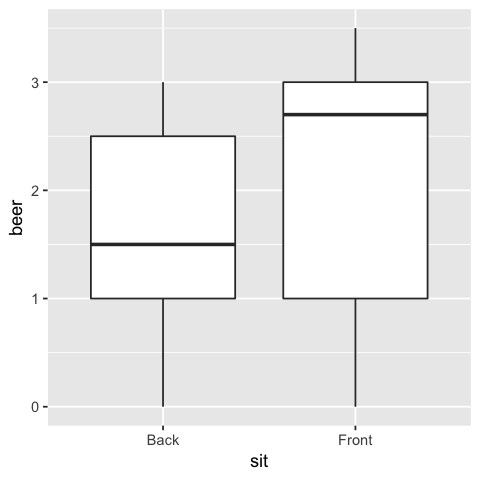

In [26]:
ggplot(data=questions.df, aes(x=sit, y=beer)) + geom_boxplot()

In [27]:
t.test(beer.f, beer.b, alternative="greater")


	Welch Two Sample t-test

data:  beer.f and beer.b
t = 0.80809, df = 17.209, p-value = 0.215
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 -0.5170137        Inf
sample estimates:
mean of x mean of y 
 2.040000  1.590909 


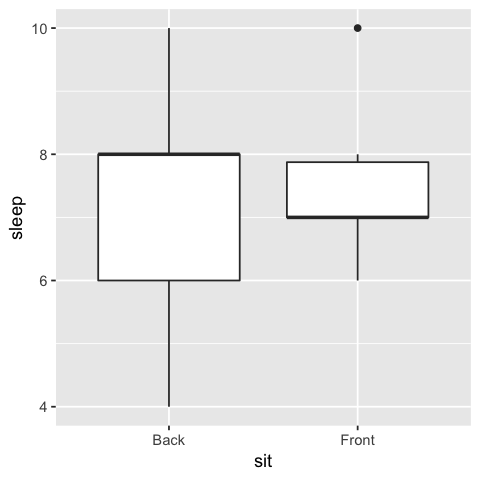

In [28]:
ggplot(data=questions.df, aes(x=sit, y=sleep)) + geom_boxplot()

In [29]:
t.test(sleep.f, sleep.b, alternative="less")


	Welch Two Sample t-test

data:  sleep.f and sleep.b
t = 0.27004, df = 16.865, p-value = 0.6048
alternative hypothesis: true difference in means is less than 0
95 percent confidence interval:
     -Inf 1.285947
sample estimates:
mean of x mean of y 
 7.400000  7.227273 


# <font color='#FD7C6E'> Dependent t-test </font>

**Data:** Hours of extra sleep effect after giving two soporific drugs to 10 patients.

In [30]:
sleep.df <- read.csv("sleep.csv")
sleep.df

extra,group,ID
0.7,1,1
-1.6,1,2
-0.2,1,3
-1.2,1,4
-0.1,1,5
3.4,1,6
3.7,1,7
0.8,1,8
0.0,1,9
2.0,1,10


In [31]:
str(sleep.df)

'data.frame':	20 obs. of  3 variables:
 $ extra: num  0.7 -1.6 -0.2 -1.2 -0.1 3.4 3.7 0.8 0 2 ...
 $ group: int  1 1 1 1 1 1 1 1 1 1 ...
 $ ID   : int  1 2 3 4 5 6 7 8 9 10 ...


In [32]:
sleep.df$group <- as.factor(sleep.df$group)
str(sleep.df)

'data.frame':	20 obs. of  3 variables:
 $ extra: num  0.7 -1.6 -0.2 -1.2 -0.1 3.4 3.7 0.8 0 2 ...
 $ group: Factor w/ 2 levels "1","2": 1 1 1 1 1 1 1 1 1 1 ...
 $ ID   : int  1 2 3 4 5 6 7 8 9 10 ...


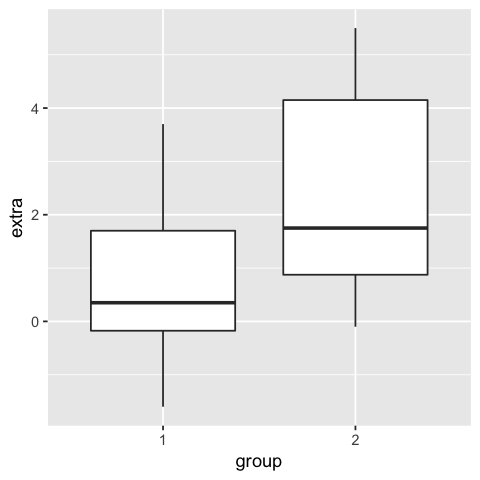

In [33]:
ggplot(data=sleep.df, aes(x=group, y=extra)) + geom_boxplot()

In [34]:
group1 <- sleep.df[sleep.df$group==1, ]$extra
group2 <- sleep.df[sleep.df$group==2, ]$extra

In [35]:
t.test(group1, group2, paired=TRUE, alternative="less")


	Paired t-test

data:  group1 and group2
t = -4.0621, df = 9, p-value = 0.001416
alternative hypothesis: true difference in means is less than 0
95 percent confidence interval:
       -Inf -0.8669947
sample estimates:
mean of the differences 
                  -1.58 


**Effect size**

\begin{equation*}
r = \sqrt{\frac{t^2}{(t^2 + df)} }
\end{equation*}

In [36]:
r <- sqrt(4.0621^2 / (4.0621^2 + 9))
r

[1] 0.8044053

# <font color='#FD7C6E'> One-way ANOVA </font>

**Data:** Age at death among members of the sovereignty, aristocracy, and gentry in Europe in 1845

In [37]:
death.df <- read.csv("death.csv")
summary(death.df)

  class           age        
 aris:2291   Min.   : 21.00  
 gent:2455   1st Qu.: 45.00  
 sovr:1440   Median : 60.00  
             Mean   : 57.68  
             3rd Qu.: 71.00  
             Max.   :102.00  

In [38]:
str(death.df)

'data.frame':	6186 obs. of  2 variables:
 $ class: Factor w/ 3 levels "aris","gent",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ age  : int  21 21 21 21 21 21 21 22 22 22 ...


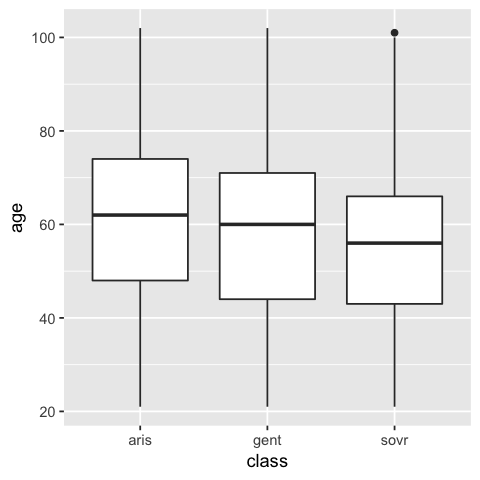

In [39]:
ggplot(data=death.df, aes(x=class, y=age)) + geom_boxplot()

In [40]:
anova <- aov(age ~ class, data = death.df)
summary(anova)

              Df  Sum Sq Mean Sq F value Pr(>F)    
class          2   32392   16196   53.76 <2e-16 ***
Residuals   6183 1862626     301                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

**Effect size**

\begin{equation*}
\eta^2 = \frac{SS_{between}}{SS_{total}} 
\end{equation*}

* small effect .01
* medium effect size .06
* large effect size .14

In [41]:
eta <- 32392/(32392 + 1862626)
eta

[1] 0.01709324

**Post-hoc tests**

In [42]:
pairwise.t.test(death.df$age, death.df$class, p.adjust.method = "BH")


	Pairwise comparisons using t tests with pooled SD 

data:  death.df$age and death.df$class 

     aris    gent   
gent 1.0e-08 -      
sovr < 2e-16 9.7e-08

P value adjustment method: BH 